# This code is used to generate and display the density models and the observation geometry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from html.entities import entitydefs

## Denssity model generation 

In [3]:
# 4 density models (homogeneous,single point, single layer, and random medium) will be generated and used for test
filename = './Green_funs_for_different_models/'
Nmodel=4                                                                             # Number of model
Nx=501; Nz=501; dx=0.01; dz=0.01;                                                    # Mesh size and spacing  
Nt=3000; nt = Nt;  dt=0.002                                                          # Time sampling rate and sampling number

Density = np.ones((Nmodel,Nx,Nz))
Density[0] = 1                                                                       # Homogeneous
Density[1,301,151] = 9.0                                                             # Single point
Density[2,:,151] = 9                                                                 # Single layer
tmpdata = np.fromfile(filename+'drho.dat', dtype=np.float32); tmpdata.shape=(Nx, Nz)
Density[3] = (tmpdata-np.min(tmpdata))*9.0/(np.max(tmpdata) - np.min(tmpdata)) + 1   # Random medium

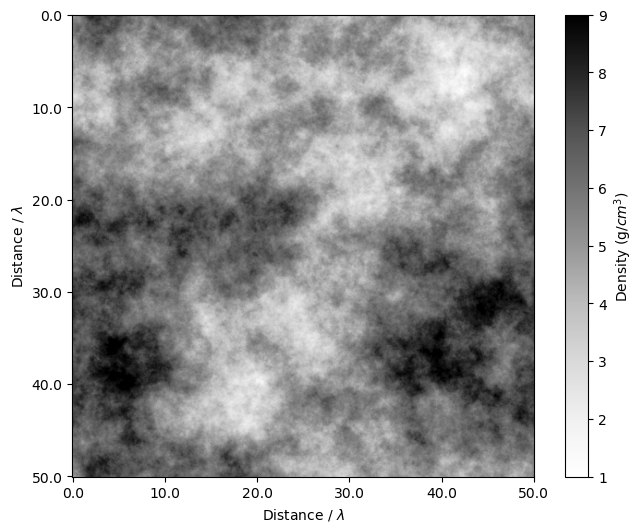

In [4]:
# Density model of random media : figure 9(a) 
Velocity  = 2                         #  Background velocity 2km/s 
frequency = 20                        #  Dominant frequency 20Hz
Lambda    = Velocity/frequency        #  Wavelength

xpos=np.arange(0,Nx);xaxis = np.arange(Nx)*dx/Lambda
ypos=np.arange(0,Nz);yaxis = np.arange(Nz)*dz/Lambda
fig_size = (8, 6);fontsz = 15
for im in range(Nmodel-1,Nmodel):
    f, ax = plt.subplots(1,1, figsize=fig_size)
    plt.imshow(Density[im].T,vmin=1,vmax=9,  cmap='Greys')
    plt.colorbar(label='Density (g/$cm^3$)')
    ax.set_xticks(xpos[0:Nx:100], labels=xaxis[0:Nx:100])
    ax.set_yticks(ypos[0:Nz:100], labels=yaxis[0:Nz:100])
    plt.xlabel('Distance / ' r'$\lambda$',);plt.ylabel('Distance / ' r'$\lambda$');
#    plt.savefig('./Pic/rho_random'+".png", bbox_inches='tight')

# Acquiation geometry for single point scatter and planar interface

In [5]:
nx=601;nz=601                                                # Full model size, boundarys (50) are included

r_min=1.99                                                   # The radius distance from source to the model center 
r_max=2.01
source_sele = np.zeros((nx,nz))
for ix in range (0, nx):
    for iz in range (0, int(nz/2)):
        r = np.sqrt( (ix*dx-3.0)**2 + (iz*dz-3.0)**2 )
        if( r>r_min and r<r_max ): 
            source_sele[ix,iz] = 1
for ix in range (Nx, 0, -1):
    for iz in range (int(Nz/2), Nz):
        r = np.sqrt( (ix*dx-3.0)**2 + (iz*dz-3.0)**2 )
        if( r>r_min and r<r_max ): 
            source_sele[ix,iz] = 1

ns = np.sum(source_sele)
print('the number of selected source is',ns)
Ns = int(ns)
coord=np.zeros((Ns,2))

#      determin the coordinates for every single source 
ir=0
for ix in range (0, nx):
    for iz in range (0, int(nz/2)):
        if(source_sele[ix,iz]==1):            
            coord[ir,0]=ix
            coord[ir,1]=iz
            ir = ir + 1
for ix in range (nx-1, -1, -1):
    for iz in range (int(nz/2), Nz):
        if(source_sele[ix,iz]==1):            
            coord[ir,0]=ix
            coord[ir,1]=iz
            ir = ir + 1            
print(ir)

the number of selected source is 2526.0
2526


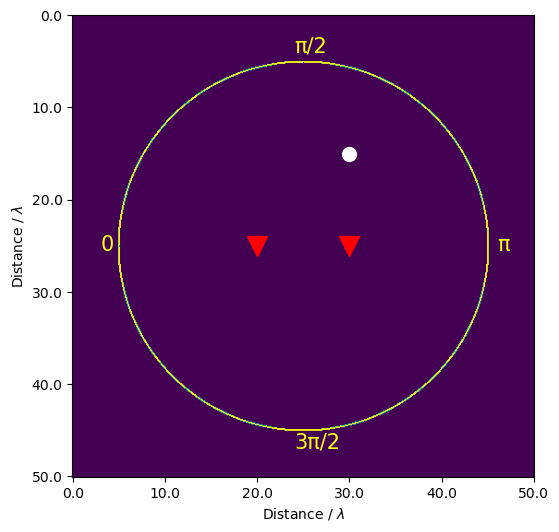

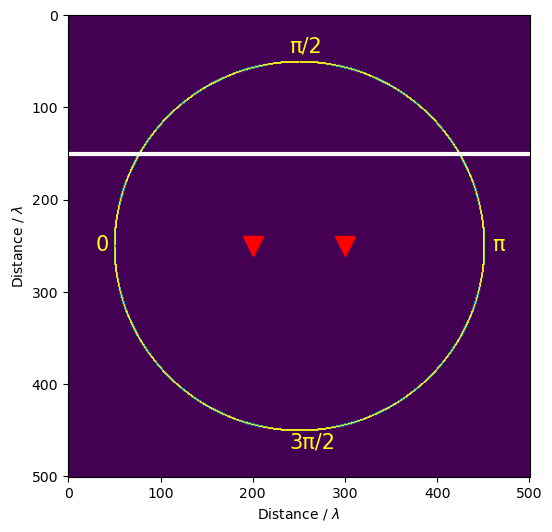

In [6]:
# Geometry for single point scatter in a homogeneous medium : Figure 5(a) 
from html.entities import entitydefs
plotsele = source_sele[50:551,50:551]
fig_size = (6, 6);fontsz = 10
xpos=np.arange(0,502);xaxis = np.arange(0,502)*0.01/(2/20)
ypos=np.arange(0,502);yaxis = np.arange(0,502)*0.01/(2/20) 

fig, ax = plt.subplots(figsize=fig_size)
plt.imshow(plotsele.T,vmin=0,vmax=1)

ax.set_xticks(xpos[0:501:100], labels=xaxis[0:501:100])
ax.set_yticks(ypos[0:501:100], labels=yaxis[0:501:100])
plt.xlabel('Distance / ' r'$\lambda$');plt.ylabel('Distance / ' r'$\lambda$');
plt.text(30,255,'0',color='#FFFF14',size=15)
plt.text(240,40,entitydefs['pi']+'/2',color='#FFFF14',size=15)
plt.text(460,255,entitydefs['pi'],color='#FFFF14',size=15)
plt.text(240,470,'3'+entitydefs['pi']+'/2',color='#FFFF14',size=15)
plt.plot(300,150,'o',color='w',markersize=10.0)
plt.plot(200,250,'v',color='r',markersize=15.0)
plt.plot(300,250,'v',color='r',markersize=15.0)

# Geometry for planar interface in a homogeneous medium : Figure 8(a)
fig, ax = plt.subplots(figsize=fig_size)
plt.imshow(plotsele.T,vmin=0,vmax=1)

plt.xlabel('Distance / ' r'$\lambda$');plt.ylabel('Distance / ' r'$\lambda$');
plt.text(30,255,'0',color='#FFFF14',size=15)
plt.text(240,40,entitydefs['pi']+'/2',color='#FFFF14',size=15)
plt.text(460,255,entitydefs['pi'],color='#FFFF14',size=15)
plt.text(240,470,'3'+entitydefs['pi']+'/2',color='#FFFF14',size=15)
plt.plot(200,250,'v',color='r',markersize=15.0)
plt.plot(300,250,'v',color='r',markersize=15.0)
x = [0, 500] 
y = [150, 150] 
plt.plot(x, y, color="white", linewidth=3)

In [8]:

# for test